In [1]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np

In [2]:
%matplotlib --list

# import matplotlib
# import matplotlib.pyplot as mpl
# import matplotlib.ticker
# import matplotlib.cm as cm

import MPLGUI as MP
%matplotlib inline

Available matplotlib backends: ['osx', 'qt4', 'qt5', 'gtk3', 'notebook', 'wx', 'qt', 'nbagg', 'gtk', 'tk', 'inline']


In [3]:
1/2.8e-4

3571.4285714285716

In [4]:
!pwd

/nfs/Data/Notebooks/Plotting


In [5]:
# Import Helpers
from Helpers.General import *

In [6]:
# Data loading example
# CDataSet = "in vivo-like"
CDataSet = "in vitro-like"

Percent = 100
DataFolder = './BSASData'
#DataFile = 'In Vitro - ContourData.npy'
DataFile = 'BSA_Full_{}.npy'.format(Percent)
BSA_Full = np.load('{}/{}'.format(DataFolder, DataFile))
DataFile = 'BSA_B_{}.npy'.format(Percent)
BSA_B = np.load('{}/{}'.format(DataFolder, DataFile))
DataFile = 'BSA_E_{}.npy'.format(Percent)
BSA_E = np.load('{}/{}'.format(DataFolder, DataFile))
DataFile = 'BSA_A_{}.npy'.format(Percent)
BSA_A = np.load('{}/{}'.format(DataFolder, DataFile))

In [9]:
len(BSA_Full)

264

In [7]:
# Figure Settings
ImgFileName = 'BSAS_{}_{}.pdf'.format(CDataSet, Percent)
Title       = 'Example Title'
XAxisLabel  = u"Intra-Ring Interface BSASA ( \u00C5\u00B2 )"
YAxisLabel  = u"Inter-Ring Interface BSASA ( \u00C5\u00B2 )"
XLim = [np.min(BSA_Full)*0.5, np.max(BSA_Full)*1.1]
YLim = XLim

In [8]:
Slope = -0.001196291
YIntercept = -4.598618311
def ScaleConv(x):
    x = np.array(x)
    Result = ((-YIntercept+np.log10(x))/(Slope))
    return Result

In [9]:
print ScaleConv(10**-3)
print ScaleConv(10**-12)
print (-3+4.598618311)/(-0.001196291)
print (-12+4.598618311)/(-0.001196291)
LogLims = np.array(XLim)*Slope+YIntercept
print 10**LogLims[0]
print 10**LogLims[1]

-1336.31224426
6186.94087726
-1336.31224426
6186.94087726
2.24001497682e-05
8.43917176179e-12


In [10]:
10**np.array([5.0,10.0])

array([  1.00000000e+05,   1.00000000e+10])

In [11]:
ContourData = np.load("{}/{}".format(MP.DefaultDataDir, "Contour-Data-{}.npy".format(CDataSet)))
# ContourData = np.load("{}/{}".format(MP.DefaultDataDir, "Contour-Data-In Vivo.npy"))
KD1Range    = np.load("{}/{}".format(MP.DefaultDataDir, "KDRange.npy"))
KD2Range    = np.load("{}/{}".format(MP.DefaultDataDir, "KDRange.npy"))

MP.matplotlib.rcParams['font.size'] = 15

In [12]:
Bounds = ScaleConv(KD1Range) > 0.0
CBound = np.zeros(ContourData.shape, dtype=bool)
for x in range(len(KD1Range)):
    for y in range(len(KD1Range)):
        if Bounds[x] and Bounds[y]:
            CBound[x,y] = True

In [13]:
# ScaleConv(KD2Range)[Bounds]
K = int(np.sqrt(ContourData[CBound].shape[0]))
CD = ContourData[CBound].reshape([K,K])[::-1,::-1]

[0.86889434341331251, 0.98121877345141395]


/home/vatir/anaconda3/envs/DataViewer27/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/vatir/anaconda3/envs/DataViewer27/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


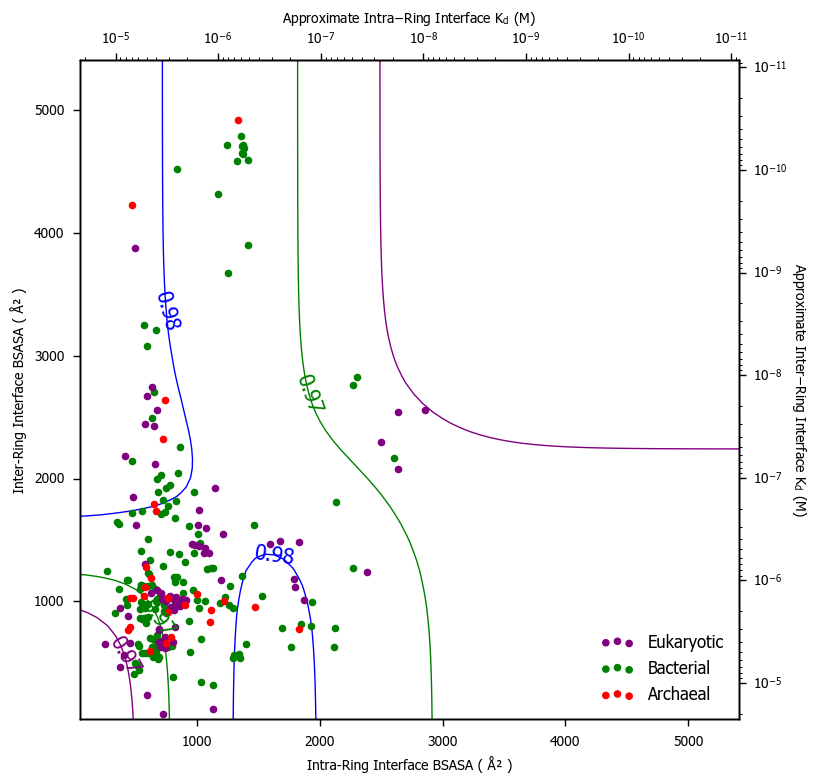

In [14]:
MainPlot = MP.MPLGPU(
    Width="double",
    Aspect = 1.0,
    axes_aspect = 1.0,
    )


SX = MainPlot._Plot.twinx()
SY = MainPlot._Plot.twiny()
SX.tick_params(
    which = 'both', # Major and Minor ticks are affected
    direction='out',
    bottom = False,
    top = True,
    left = False,
    right = True,
)
SX.tick_params(
    which = 'major',
    length = 5.0,
    width = 1.0,
    pad = 6.0, # How far are the labels from the mark
)
SX.tick_params(
    which = 'minor',
    length = 2.5,
    width = 0.75,
    pad = 5.0,
)
SY.tick_params(
    which = 'both', # Major and Minor ticks are affected
    direction='out',
    bottom = False,
    top = True,
    left = False,
    right = True,
)
SY.tick_params(
    which = 'major',
    length = 5.0,
    width = 1.0,
    pad = 6.0, # How far are the labels from the mark
)
SY.tick_params(
    which = 'minor',
    length = 2.5,
    width = 0.75,
    pad = 5.0,
)

# SX.set_xlabel("TempSXx")
SY.set_xlabel(r"Approximate Intra-Ring Interface $K_d$ (M)")
SX.set_ylabel(r"Approximate Inter-Ring Interface $K_d$ (M)", rotation=270, labelpad=15)
# SY.set_ylabel("TempSYy")

# SX.set_ylim(10**-3,10**-12)
# SY.set_yscale('log')
# SX.set_xlim(10**-3,10**-12)
# SX.set_xscale('log')
Min = 10**LogLims[0]
Max = 10**LogLims[1]
SX.loglog([Min, Max, Min, Max], [Max, Max, Min, Min], alpha=0)
SY.loglog([Min, Max, Min, Max], [Max, Max, Min, Min], alpha=0)
SX.set_xlim([Min, Max])
SY.set_xlim([Min, Max])
SX.set_ylim([Min, Max])
SY.set_ylim([Min, Max])


Bounds = ScaleConv(KD1Range) > 0.0
CBound = np.zeros(ContourData.shape, dtype=bool)
for x in range(len(KD1Range)):
    for y in range(len(KD1Range)):
        if Bounds[x] and Bounds[y]:
            CBound[x,y] = True

            
# ContourLevels = [
#                 0.40,
#                 0.60,
#                 0.63,
#                 0.65,
#                 ]

ZLim = [np.min(ContourData), np.max(ContourData)]
Delta = ZLim[1] - ZLim[0]
print ZLim
ContourLevels = [
        ZLim[0]+1.0*Delta/5.0,
        ZLim[0]+2.0*Delta/5.0,
        ZLim[0]+3.0*Delta/5.0,
        ZLim[0]+4.0*Delta/5.0,
        ]
if CDataSet == "in vivo-like":
    ContourLevels = [
            ZLim[0]+1.0*Delta/5.0,
            ZLim[0]+2.0*Delta/5.0,
            ZLim[0]+3.0*Delta/5.0,
            ZLim[0]+4.0*Delta/5.0,
            0.97,
            0.975,
            0.98
            ]

ContourLines =  MainPlot._Plot.contour(
    ScaleConv(KD1Range)[Bounds][::-1],
    ScaleConv(KD2Range)[Bounds][::-1],
    CD,
    ContourLevels,
    origin='lower',
    linewidths=1.0,
    colors=(
        'purple',
        'green',
        'blue',
        'r',
    )
)
MainPlot._Plot.clabel(
    ContourLines,
    ContourLevels,
    inline=0,
    fmt='%.2f',
    fontsize=15,
    orientation='vertical',
    inline_spacing = 5.0,
)

# if ContourLevels[-1] > 0.95:
#     ContourLevels = ContourLevels[:-1]
# Colorbar = MP.mpl.colorbar(
#         ContourLines,
#         #     ticklocation = [],
#         ticks = [ZLim[0],ZLim[1]]+ContourLevels,
#         format = '%1.1f',
# #                 format = '%3d%%',
#         drawedges = False,
#         orientation = 'vertical',
#         #     shrink=0.8,
#         #     extend='neither'
# #                 shrink=0.8
#     )

# Colorbar.ax.tick_params(which='both',length=0)
# # Colorbar.ax.set_xticks([ZLim[0],ZLim[1]]+ContourLevels)
# Colorbar.add_lines(ContourLines)
# # Colorbar.set_ticks(ContourLevels)
# Colorbar.update_ticks()
# # MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
# # CB = MP.plt.colorbar(ContourLines, shrink=0.8)
# l,b,w,h = MP.plt.gca().get_position().bounds
# ll,bb,ww,hh = CB.ax.get_position().bounds
# CB.ax.set_position([ll, b+0.1*h, ww, h*0.8])


# MainPlot.AddLine(
#     np.linspace(XLim[0],XLim[1]),
#     np.linspace(YLim[0],YLim[1]),
#     color="red",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=0,
#     xlog = False,
#     )

# MainPlot._Plot.scatter(
#     BSA_Full[:,0],
#     BSA_Full[:,1],
#     color="b",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=1,
#     )
MainPlot._Plot.scatter(
    BSA_E[:,0],
    BSA_E[:,1],
    color="purple",
    clip_on=False,
    label="Eukaryotic",
#     alpha=0.5,
    zorder=3,
    )
MainPlot._Plot.scatter(
    BSA_B[:,0],
    BSA_B[:,1],
    color="g",
    label="Bacterial",
    clip_on=False,
#     alpha=0.5,
    zorder=2,
    )
MainPlot._Plot.scatter(
    BSA_A[:,0],
    BSA_A[:,1],
    color="r",
    label="Archaeal",
    clip_on=False,
#     alpha=0.5,
    zorder=3,
    )

MainPlot._Plot.set_xscale('linear')
MainPlot._Plot.set_yscale('linear')

# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_B[XBounds]/B0,
#     label="B",
#     color="Blue",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=1
#     )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_AB[XBounds]/np.min([A0,B0]),
#     label="AB",
#     color="Orange",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=0
#     )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
#     loc = "best",
    loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5
    )

MainPlot.SetXRange(XLim[0],XLim[1])
MainPlot.SetYRange(YLim[0],YLim[1])


MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)

ImgFileName = "".join(ImgFileName.split())

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )